# Dijkstra's **algorithm**

- Nodes: s, t, x, y, z
- Edges and weights:
 - (s, t) with weight 10
 - (t, x) with weight 1
 - (s, y) with weight 5
 - (t, y) with weight 2
 - (y, t) with weight 3
 - (y, x) with weight 9
 - (x, z) with weight 4
 - (z, x) with weight 6
 - (y, z) with weight 2
 - (z, s) with weight 7

In [ ]:
import heapq

def dijkstra(graph, start):
    # Initialize distances with infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Priority queue to store nodes with their tentative distances
    priority_queue = [(0, start)]

    while priority_queue:
        # Pop the node with the smallest tentative distance
        current_distance, current_node = heapq.heappop(priority_queue)

        # If current node's distance is already less than the popped distance, skip
        if current_distance > distances[current_node]:
            continue

        # Update distances to neighbors through current node
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            # If the new distance is smaller than the existing one, update it
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                # Add neighbor to the priority queue with the new distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Define the graph
graph = {
    's': {'t': 10, 'y': 5, 'z': 7},
    't': {'x': 1, 'y': 2},
    'x': {'z': 4},
    'y': {'t': 3, 'x': 9, 'z': 2},
    'z': {'s': 7, 'x': 6}
}

# Find the shortest paths from 's' to all other nodes
shortest_paths = dijkstra(graph, 's')

# Print the shortest paths
print("Shortest paths from 's':")
for node, distance in shortest_paths.items():
    print(f"To node {node}: Distance {distance}")


Shortest paths from 's':
To node s: Distance 0
To node t: Distance 8
To node x: Distance 9
To node y: Distance 5
To node z: Distance 7


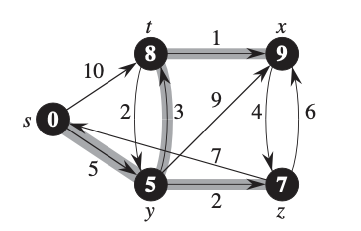


# **Bellman-Ford algorithm**



- Nodes: s, t, x, y, z
- Edges and weights:
 - (s, t) with weight 6
 - (t, x) with weight 5
 - (s, y) with weight 7
 - (t, y) with weight 8
 - (y, x) with weight -3
 - (t, z) with weight -4
 - (z, x) with weight 7
 - (y, z) with weight 9
 - (z, s) with weight 2
 - (x, t) with weight -2



In [ ]:
def bellman_ford(graph, start):
    # Initialize distances with infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Relax edges repeatedly
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbor, weight in graph[node].items():
                # Relax the edge
                if distances[node] + weight < distances[neighbor]:
                    distances[neighbor] = distances[node] + weight

    # Check for negative cycles
    for node in graph:
        for neighbor, weight in graph[node].items():
            if distances[node] + weight < distances[neighbor]:
                raise ValueError("Graph contains a negative cycle")

    return distances

# Define the graph
graph = {
    's': {'t': 6, 'y': 7, 'z': 2},
    't': {'x': 5, 'y': 8, 'z': -4},
    'x': {'t': -2},
    'y': {'x': -3, 'z': 9},
    'z': {'x': 7, 's': 2}
}

# Find the shortest paths from 's' to all other nodes
shortest_paths = bellman_ford(graph, 's')

# Print the shortest paths
print("Shortest paths from 's':")
for node, distance in shortest_paths.items():
    print(f"To node {node}: Distance {distance}")


Shortest paths from 's':
To node s: Distance 0
To node t: Distance 2
To node x: Distance 4
To node y: Distance 7
To node z: Distance -2
